In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as st
from scipy.stats import linregress

C:\Users\Noah\AppData\Local\Temp\ipykernel_21160\1349831272.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Photoelectric Effect

## Part A -- Setup
Turned on the Hg vapour light source and dimmed lights. Let the device warm up for ~5 minutes. Focused the light emitted from the Hg source onto
the slot in the white reflective mask on the h/e apparatus. Tried grating flipped in both directions and used the one with less loss. Also check the spectral lines to the left and right of center and use the ones that are clearer. Moved light shield to look at the spectrum on the white screen outside the apparatus. Adjusted assembly spacing until the sharpest image was visible.

Connected voltmeter leads to output terminals on the h/e apparatus.

Mercury Lamp Device #: U4-1477\
Photodiode Apparatus #: 
DMM# - BK Precision 2831B: U4-1575

**PICTUREPICTUREPICTURE**

## Part B -- Effect of Light Intensity

Adjusted apparatus so only one of spectrum components is hitting the photodiode. In our case, we used the blue one.

Using a stopwatch, the different charge time after discharge for each transmission percentage was measured, as well as the stopping potential for each transmission value.\

**Error avoidance strategies**
Multiple measurements were taken of each decay time then averaged to try and remove some of the random error in the stopwatch timer. On top of this, a first trial was done where we allowed the system to plateau, then recorded the stopping potential of the system. Next, three tests were done for each transmission level where the stopwatch was stopped immediately when the DMM flipped over to the recorded value from the first test. This allowed us to have a consistent point to record the recharge time at and hopefully reduce error. When compared to the standard average standard deviations of each of the measurement sets taken, the estimated reaction time is lower than the effect of the random error of the system that is seen in the standard deviation calculation so the human reflex error can be disregarded in favor of using the standard deviation.

Estimated error values:\
Human Reflex Error: +- 0.5s (irrelevant)\


**Compute standard deviation on numbers, take larer error between that and reaction time**

The average standard deviation of the first colour is 1.964
The average standard deviation of the second colour is 0.786


,C1 Transmission %,C1 Stopping Potential [V],C1 Recharge Time [s]
0,100,1.100,26.403333
1,80,1.097,32.053333
2,60,1.094,36.923333
3,40,1.093,43.286667
4,20,1.077,63.970000


,C2 Transmission %,C2 Stopping Potential [V],C2 Recharge Time [s]
0,100,0.678,22.356667
1,80,0.678,26.616667
2,60,0.676,30.156667
3,40,0.675,34.363333
4,20,0.670,41.353333


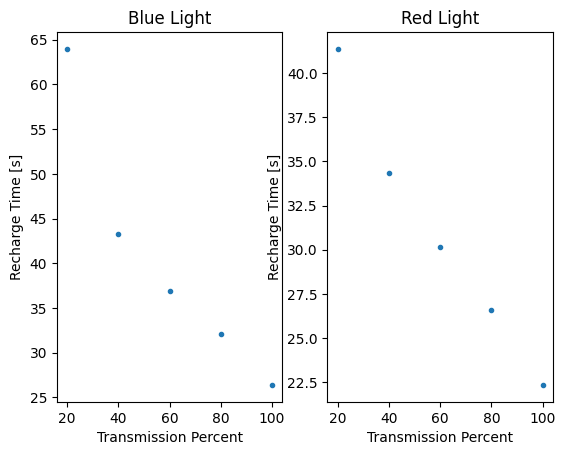

In [3]:
transmissionPercents = [100, 80, 60, 40, 20]

# Coulour 1 is the blue spectrum line
colour1StoppingPotentials_volts = [1.100, 1.097, 1.094, 1.093, 1.077]
colour1rechargeTime_s = [np.average((25.72, 26.12, 27.37)), 
                         np.average((29.34, 34.66, 32.16)), 
                         np.average((37.25, 36.93, 36.59)), 
                         np.average((46.29, 45.44, 38.13)), 
                         np.average((66.37, 59.72, 65.82))]

# Checking average standard deviation across first dataset
stdCheck1 = np.array([[25.72, 26.12, 27.37],
                     [29.34, 34.66, 32.16],
                     [37.25, 36.93, 36.59],
                     [46.29, 45.44, 38.13],
                     [66.37, 59.72, 65.82]])

stdDevs1 = []
for i in range(len(stdCheck1)): stdDevs1.append(np.std(stdCheck1[i]))
print(f"The average standard deviation of the first colour is {np.average(stdDevs1):.3f}")

# Coulour 2 is the green spectrum line
colour2StoppingPotentials_volts = [0.678, 0.678, 0.676, 0.675, 0.670]
colour2rechargeTime_s = [np.average((22.32, 22.75, 22.0)), 
                         np.average((26.69, 25.44, 27.72)),
                         np.average((31.71, 29.41, 29.35)), 
                         np.average((34.10, 33.87, 35.12)), 
                         np.average((40.34, 42.25, 41.47))]

# Checking average standard deviation across second dataset
stdCheck2 = np.array([[22.32, 22.75, 23.00],
                     [26.69, 25.44, 27.72],
                     [31.71, 28.41, 29.35],
                     [34.10, 33.87, 35.12],
                     [40.34, 42.25, 41.47]])

stdDevs2 = []
for i in range(len(stdCheck2)): stdDevs2.append(np.std(stdCheck2[i]))
print(f"The average standard deviation of the second colour is {np.average(stdDevs2):.3f}")


fig, (colour1Plot, colour2Plot) = plt.subplots(1, 2)

colour1Plot.plot(transmissionPercents, colour1rechargeTime_s, '.')
colour1Plot.set(title='Blue Light', xlabel='Transmission Percent', ylabel='Recharge Time [s]')

colour2Plot.plot(transmissionPercents, colour2rechargeTime_s, '.')
colour2Plot.set(title='Red Light', xlabel='Transmission Percent', ylabel='Recharge Time [s]')


# CODE TO PRINT NICE TABLES

colour1Data = {
    'C1 Transmission %':transmissionPercents,
    'C1 Stopping Potential [V]':colour1StoppingPotentials_volts,
    'C1 Recharge Time [s]':colour1rechargeTime_s
}

colour2Data = {
    'C2 Transmission %':transmissionPercents,
    'C2 Stopping Potential [V]':colour2StoppingPotentials_volts,
    'C2 Recharge Time [s]':colour2rechargeTime_s
}

c1df = pd.DataFrame(colour1Data)
display(c1df)

c2df = pd.DataFrame(colour2Data)
display(c2df)

### This data follows the expected trend
As the light transmission percentage decreases, we see that the recharge time of the capacitor increases. This makes sense because less light is hitting the photodiode, meaning less power is being put into the photodiode, so there is less power to charge the capacitor. Since power is energy/time, if less power is being put into the capacitor, to reach its maximum charge it will take longer.

The average standard deviation of the first colour is 1.964
The average standard deviation of the second colour is 0.786


[Text(0.5, 1.0, 'Green Light'),
 Text(0.5, 0, 'Transmission Percent'),
 Text(0, 0.5, 'Recharge Time [s]')]

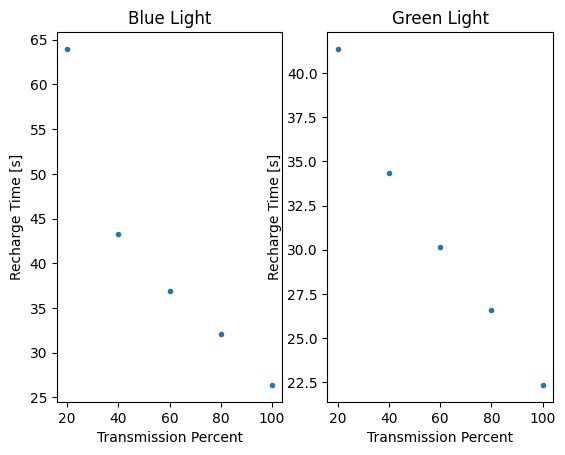

In [4]:
transmissionPercents = [100, 80, 60, 40, 20]

# Coulour 1 is the blue spectrum line
col1StoppingPotentials_volts = np.array([1.100, 1.097, 1.094, 1.093, 1.077])
col1rechargeTime_s = [np.average((25.72, 26.12, 27.37)), 
                         np.average((29.34, 34.66, 32.16)), 
                         np.average((37.25, 36.93, 36.59)), 
                         np.average((46.29, 45.44, 38.13)), 
                         np.average((66.37, 59.72, 65.82))]

# Checking average standard deviation across first dataset
stdCheck1 = np.array([[25.72, 26.12, 27.37],
                     [29.34, 34.66, 32.16],
                     [37.25, 36.93, 36.59],
                     [46.29, 45.44, 38.13],
                     [66.37, 59.72, 65.82]])

stdDevs1 = []
for i in range(len(stdCheck1)): stdDevs1.append(np.std(stdCheck1[i]))
print(f"The average standard deviation of the first colour is {np.average(stdDevs1):.3f}")

# Coulour 2 is the green spectrum line
col2StoppingPotentials_volts = [0.678, 0.678, 0.676, 0.675, 0.670]
col2rechargeTime_s = [np.average((22.32, 22.75, 22.0)), 
                         np.average((26.69, 25.44, 27.72)),
                         np.average((31.71, 29.41, 29.35)), 
                         np.average((34.10, 33.87, 35.12)), 
                         np.average((40.34, 42.25, 41.47))]

# Checking average standard deviation across second dataset
stdCheck2 = np.array([[22.32, 22.75, 23.00],
                     [26.69, 25.44, 27.72],
                     [31.71, 28.41, 29.35],
                     [34.10, 33.87, 35.12],
                     [40.34, 42.25, 41.47]])

stdDevs2 = []
for i in range(len(stdCheck2)): stdDevs2.append(np.std(stdCheck2[i]))
print(f"The average standard deviation of the second colour is {np.average(stdDevs2):.3f}")


fig, (col1Plot, col2Plot) = plt.subplots(1, 2)


col1Plot.plot(transmissionPercents, col1rechargeTime_s, '.')
col1Plot.set(title='Blue Light', xlabel='Transmission Percent', ylabel='Recharge Time [s]')

col2Plot.plot(transmissionPercents, colour2rechargeTime_s, '.')
col2Plot.set(title='Green Light', xlabel='Transmission Percent', ylabel='Recharge Time [s]')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[26.403333333333336, 32.053333333333335, 36.92333333333334, 43.28666666666666, 63.97]
[0.03787400580734755, 0.03119800332778702, 0.02708314525593572, 0.023101801940551364, 0.01563232765358762]
The average standard deviation of the first colour is 1.638
[0.001434440315894996, 0.00097331541164061, 0.0007334967569541135, 0.0005336932529004627, 0.00024436966786912023] [0.002000718079949095, 0.001411538306208926, 0.0010995964493248718, 0.00084685572959204, 0.0005847617481818913]
The average standard deviation of the second colour is 0.786


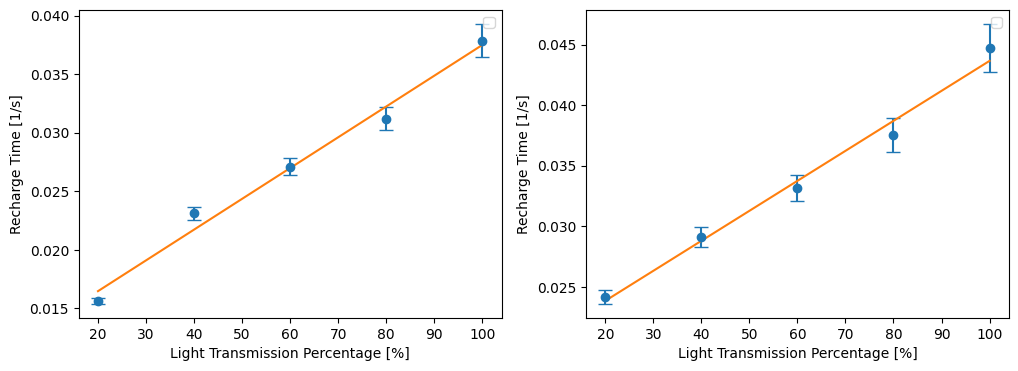

In [5]:
transmissionPercents = np.array([100, 80, 60, 40, 20])

# Coulour 1 is the blue spectrum line
col1StoppingPotentials_volts = np.array([1.100, 1.097, 1.094, 1.093, 1.077])
col1rechargeTime_s = [np.average((25.72, 26.12, 27.37)), 
                         np.average((29.34, 34.66, 32.16)), 
                         np.average((37.25, 36.93, 36.59)), 
                         np.average((46.29, 45.44, 38.13)), 
                         np.average((66.37, 59.72, 65.82))]

print(col1rechargeTime_s)

recharge1Inverse=[]
error1 = []
errorCoeff1=[]

for i in range(len(col1rechargeTime_s)):
    recharge1Inverse.append(1/ col1rechargeTime_s[i])
    errorCoeff1.append(1/col1rechargeTime_s[i])
    error1.append(recharge1Inverse[i]*errorCoeff1[i])
print(recharge1Inverse)


    
linReg1 = linregress(transmissionPercents, recharge1Inverse)
linRegVals1 = linReg1[0]*transmissionPercents + linReg1[1]

# Checking average standard deviation across first dataset
stdCheck1 = np.array([[25.72, 26.12, 27.37],
                     [29.34, 34.66, 32.16],
                     [37.25, 36.93, 36.59],
                     [46.29, 45.44, 38.13],
                     [66.37, 59.72, 65.82]])

stdDevs1 = [0.005, ]
for i in range(len(stdCheck1)): stdDevs1.append(np.std(stdCheck1[i]))
print(f"The average standard deviation of the first colour is {np.average(stdDevs1):.3f}")

# Coulour 2 is the green spectrum line
col2StoppingPotentials_volts = [0.678, 0.678, 0.676, 0.675, 0.670]
col2rechargeTime_s = [np.average((22.32, 22.75, 22.0)), 
                         np.average((26.69, 25.44, 27.72)),
                         np.average((31.71, 29.41, 29.35)), 
                         np.average((34.10, 33.87, 35.12)), 
                         np.average((40.34, 42.25, 41.47))]


recharge2Inverse = []
error2 = []
errorCoeff2=[]

for i in range(len(col2rechargeTime_s)):
    recharge2Inverse.append(1/ col2rechargeTime_s[i])
    errorCoeff2.append(1/col2rechargeTime_s[i])
    error2.append(recharge2Inverse[i]*errorCoeff2[i])
    
print(error1, error2)

    
linReg2 = linregress(transmissionPercents, recharge2Inverse)
linRegVals2 = linReg2[0]*transmissionPercents + linReg2[1]

# Checking average standard deviation across second dataset
stdCheck2 = np.array([[22.32, 22.75, 23.00],
                     [26.69, 25.44, 27.72],
                     [31.71, 28.41, 29.35],
                     [34.10, 33.87, 35.12],
                     [40.34, 42.25, 41.47]])

stdDevs2 = []
for i in range(len(stdCheck2)): stdDevs2.append(np.std(stdCheck2[i]))
print(f"The average standard deviation of the second colour is {np.average(stdDevs2):.3f}")


plt.figure(figsize=(12, 4))

# Subplot 1: Filtered and unfiltered sinusoidal functions
plt.subplot(1, 2, 1)
# plt.plot(transmissionPercents, recharge1Inverse, '.')
plt.errorbar(transmissionPercents, recharge1Inverse, yerr=error1, fmt='o', capsize=5, label="")
plt.plot(transmissionPercents, linRegVals1)
plt.xlabel('Light Transmission Percentage [%]')
plt.ylabel('Recharge Time [1/s]')
# plt.xticks(np.linspace(0, 20, num=3)) 
# plt.yticks(np.linspace(-4, 4, num=5))
plt.legend()

# Subplot 2: Filtered and unfiltered dft values
plt.subplot(1, 2, 2)
plt.errorbar(transmissionPercents, recharge2Inverse, yerr=error2, fmt='o', capsize=5, label="")
plt.plot(transmissionPercents, linRegVals2)
plt.xlabel('Light Transmission Percentage [%]')
plt.ylabel('Recharge Time [1/s]')
# plt.yticks(np.linspace(0, 300, num=7))  
plt.legend()

plt.show()


# fig, (col1Plot, col2Plot) = plt.subplots(1, 2)


# col1Plot.plot(transmissionPercents, recharge1Inverse, '.')
# col1Plot.set(title='Blue Light', xlabel='Transmission Percent', ylabel='Recharge Time [s]')

# col2Plot.plot(transmissionPercents, recharge2Inverse, '.')
# col2Plot.set(title='Green Light', xlabel='Transmission Percent', ylabel='Recharge Time [s]')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[26.403333333333336, 32.053333333333335, 36.92333333333334, 43.28666666666666, 63.97]
[0.03787400580734755, 0.03119800332778702, 0.02708314525593572, 0.023101801940551364, 0.01563232765358762]
The average standard deviation of the first colour is 1.638


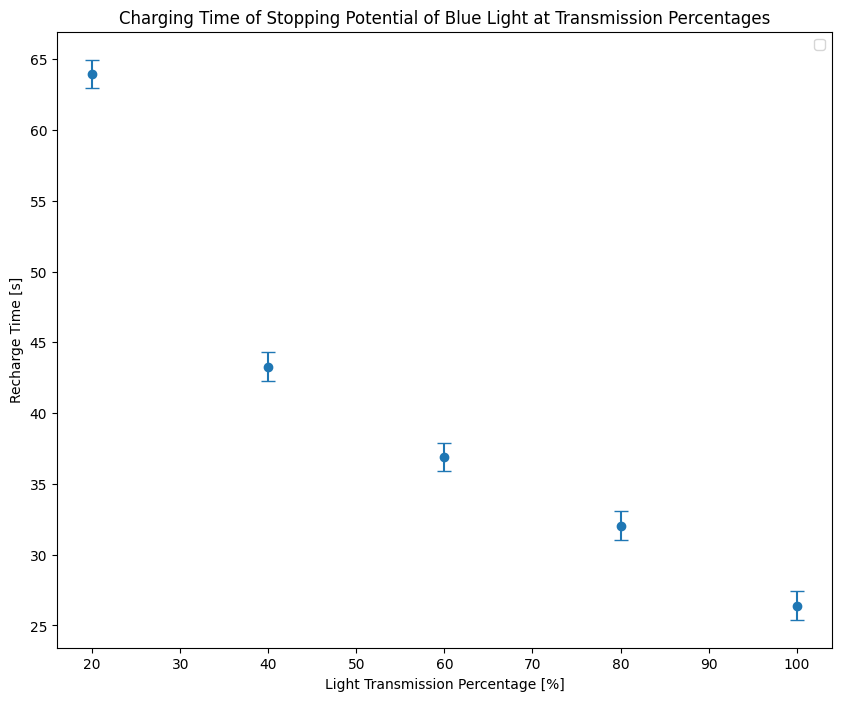

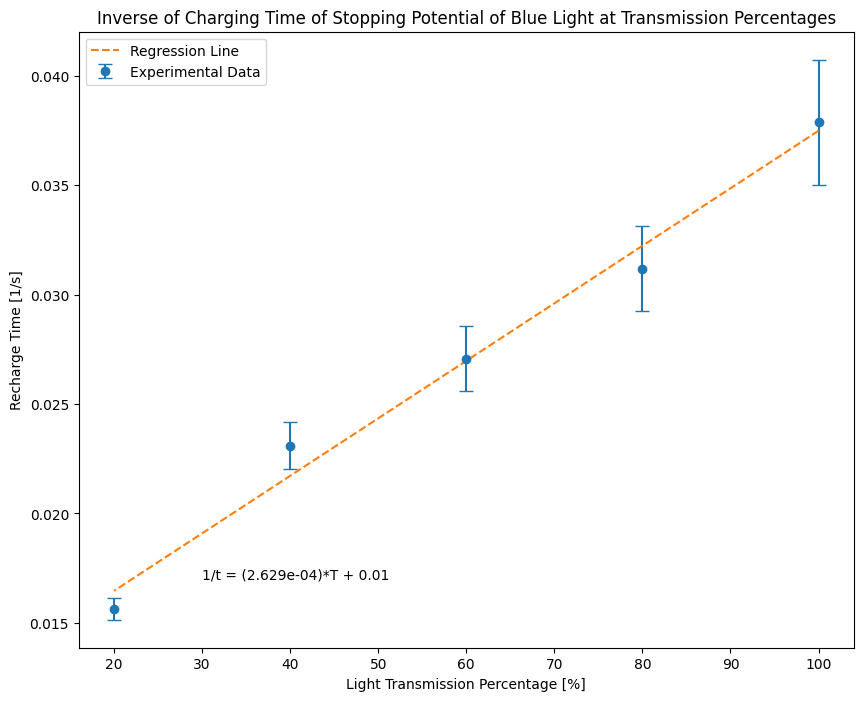

In [6]:
transmissionPercents = np.array([100, 80, 60, 40, 20])

# Coulour 1 is the blue spectrum line
col1StoppingPotentials_volts = np.array([1.100, 1.097, 1.094, 1.093, 1.077])
col1rechargeTime_s = [np.average((25.72, 26.12, 27.37)), 
                         np.average((29.34, 34.66, 32.16)), 
                         np.average((37.25, 36.93, 36.59)), 
                         np.average((46.29, 45.44, 38.13)), 
                         np.average((66.37, 59.72, 65.82))]

print(col1rechargeTime_s)

recharge1Inverse=[]
error1 = []
errorCoeff1=[]

for i in range(len(col1rechargeTime_s)):
    recharge1Inverse.append(1/ col1rechargeTime_s[i])
    errorCoeff1.append(2/col1rechargeTime_s[i])
    error1.append(recharge1Inverse[i]*errorCoeff1[i])
print(recharge1Inverse)


    
linReg1 = linregress(transmissionPercents, recharge1Inverse)
linRegVals1 = linReg1[0]*transmissionPercents + linReg1[1]

# Checking average standard deviation across first dataset
stdCheck1 = np.array([[25.72, 26.12, 27.37],
                     [29.34, 34.66, 32.16],
                     [37.25, 36.93, 36.59],
                     [46.29, 45.44, 38.13],
                     [66.37, 59.72, 65.82]])

stdDevs1 = [0.005, ]
for i in range(len(stdCheck1)): stdDevs1.append(np.std(stdCheck1[i]))
print(f"The average standard deviation of the first colour is {np.average(stdDevs1):.3f}")

plt.figure(figsize=(10,8))

plt.title("Charging Time of Stopping Potential of Blue Light at Transmission Percentages")

plt.errorbar(transmissionPercents, col1rechargeTime_s, yerr=1, fmt='o', capsize=5)
plt.xlabel('Light Transmission Percentage [%]')
plt.ylabel('Recharge Time [s]')
# plt.xticks(np.linspace(0, 20, num=3)) 
# plt.yticks(np.linspace(-4, 4, num=5))
plt.legend()

plt.show()

plt.figure(figsize=(10,8))



plt.title("Inverse of Charging Time of Stopping Potential of Blue Light at Transmission Percentages")

plt.errorbar(transmissionPercents, recharge1Inverse, yerr=error1, fmt='o', capsize=5, label="Experimental Data")
plt.plot(transmissionPercents, linRegVals1, linestyle="dashed", label='Regression Line')
plt.xlabel('Light Transmission Percentage [%]')
plt.ylabel('Recharge Time [1/s]')
plt.text(30, 0.017, f"1/t = ({linReg1[0]:.3e})*T + {linReg1[1]:.2f}")

# plt.xticks(np.linspace(0, 20, num=3)) 
# plt.yticks(np.linspace(-4, 4, num=5))
plt.legend()

plt.show()

The average standard deviation of the second colour is 0.786


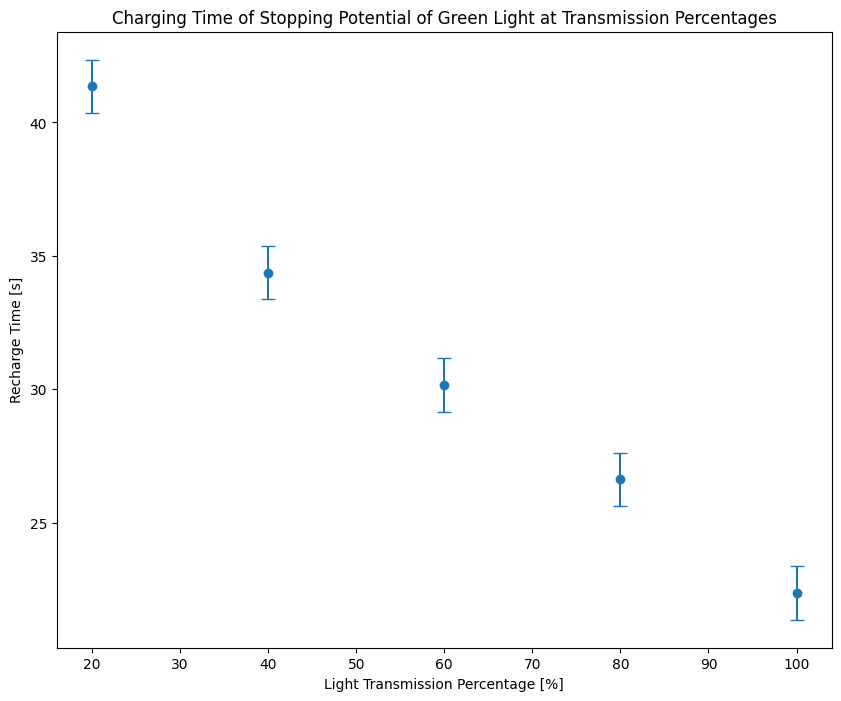

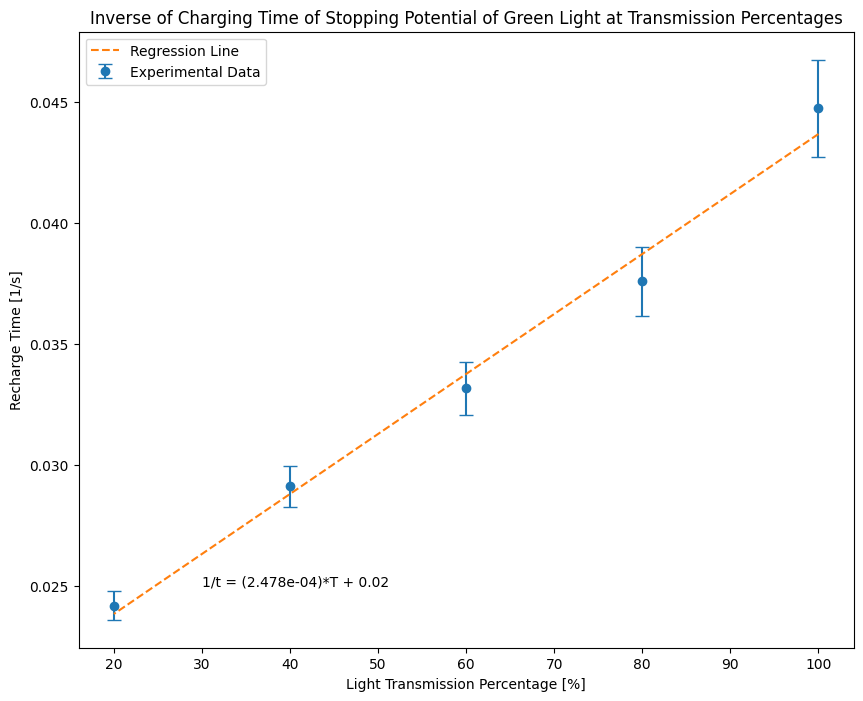

In [7]:
# Coulour 2 is the green spectrum line
col2StoppingPotentials_volts = [0.678, 0.678, 0.676, 0.675, 0.670]
col2rechargeTime_s = [np.average((22.32, 22.75, 22.0)), 
                         np.average((26.69, 25.44, 27.72)),
                         np.average((31.71, 29.41, 29.35)), 
                         np.average((34.10, 33.87, 35.12)), 
                         np.average((40.34, 42.25, 41.47))]


recharge2Inverse = []
error2 = []
errorCoeff2=[]

for i in range(len(col2rechargeTime_s)):
    recharge2Inverse.append(1/ col2rechargeTime_s[i])
    errorCoeff2.append(1/col2rechargeTime_s[i])
    error2.append(recharge2Inverse[i]*errorCoeff2[i])
    
    
linReg2 = linregress(transmissionPercents, recharge2Inverse)
linRegVals2 = linReg2[0]*transmissionPercents + linReg2[1]

# Checking average standard deviation across second dataset
stdCheck2 = np.array([[22.32, 22.75, 23.00],
                     [26.69, 25.44, 27.72],
                     [31.71, 28.41, 29.35],
                     [34.10, 33.87, 35.12],
                     [40.34, 42.25, 41.47]])

stdDevs2 = []
for i in range(len(stdCheck2)): stdDevs2.append(np.std(stdCheck2[i]))
print(f"The average standard deviation of the second colour is {np.average(stdDevs2):.3f}")
plt.figure(figsize=(10,8))



plt.title("Charging Time of Stopping Potential of Green Light at Transmission Percentages")

plt.errorbar(transmissionPercents, col2rechargeTime_s, yerr=1, fmt='o', capsize=5, label="")
plt.xlabel('Light Transmission Percentage [%]')
plt.ylabel('Recharge Time [s]')
# plt.xticks(np.linspace(0, 20, num=3)) 
# plt.yticks(np.linspace(-4, 4, num=5))


plt.show()
 
plt.figure(figsize=(10,8))


plt.title("Inverse of Charging Time of Stopping Potential of Green Light at Transmission Percentages")

plt.errorbar(transmissionPercents, recharge2Inverse, yerr=error2, fmt='o', capsize=5, label='Experimental Data')
plt.plot(transmissionPercents, linRegVals2, linestyle="dashed", label='Regression Line')
plt.xlabel('Light Transmission Percentage [%]')
plt.ylabel('Recharge Time [1/s]')
plt.text(30, 0.025, f"1/t = ({linReg2[0]:.3e})*T + {linReg2[1]:.2f}")
# plt.xticks(np.linspace(0, 20, num=3)) 
# plt.yticks(np.linspace(-4, 4, num=5))
plt.legend()

plt.show()

## Part C - Photon energy as a function of frequency
Adjusted h/e apparatus so that only the yellow segment of the mercury spectrum is hitting the photodiode. Applied yellow filter to mask on apparatus.

Recorded the stopping potential after zeroing h/e apparatus for yellow light passing through filter. Waited for charge reading to plateau and be consistent before taking a voltage reading.

Repeated same steps for each component of the spectrum split out by the grating. (Yellow, Green, Blue, Violet1, Violet2)

Error on DMM taken to be +/- 0.5% of the reading

,Light Colour,Frequency [Hz],Stopping Potential [V]
0,Yellow,5.190000e+14,0.555
1,Green,5.490000e+14,0.669
2,Blue,6.880000e+14,1.268
3,Violet1,7.410000e+14,1.478
4,Violet2,8.200000e+14,1.741


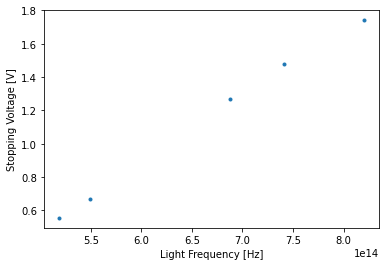

In [8]:
lightColours = ['Yellow', 'Green', 'Blue', 'Violet1', 'Violet2']
lightFrequencies_Hz = [5.19e14, 5.49e14, 6.88e14, 7.41e14, 8.20e14]
partCStoppingPotentials_V = [0.555, 0.669, 1.268, 1.478, 1.741]


fig, ax1 = plt.subplots(1,1)

ax1.plot(lightFrequencies_Hz, partCStoppingPotentials_V, '.')
ax1.set(label='Stopping Potential as a function of Frequency', xlabel='Light Frequency [Hz]', ylabel='Stopping Voltage [V]')

# Display table code
partCData = {
    'Light Colour':lightColours,
    'Frequency [Hz]':lightFrequencies_Hz,
    'Stopping Potential [V]':partCStoppingPotentials_V
}
partCdf = pd.DataFrame(partCData)
display(partCdf)

1.1221653650472665e-16
4.022950043939701e-15


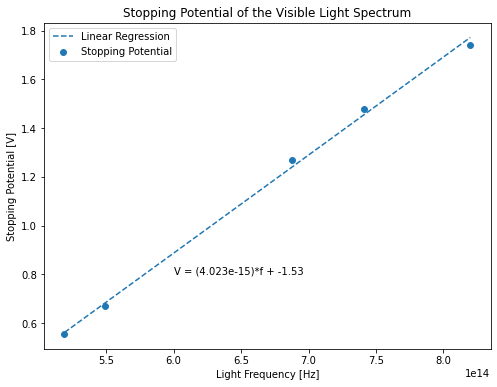

In [12]:
lightColours = np.array(['goldenrod', 'green', 'blue', 'blueviolet', 'purple'])
labels = np.array(['Yellow Stopping Potential', 'Green Stopping Potential','Blue Stopping Potential', 'First Violet Stopping Potential','Second Violet Stopping Potential'])
lightFreq = np.array([5.19e14, 5.49e14, 6.88e14, 7.41e14, 8.20e14])
stoppingPot = np.array([0.555, 0.669, 1.268, 1.478, 1.741])

linReg = linregress(lightFreq, stoppingPot)
linRegVals = linReg[0]*lightFreq + linReg[1]
stdErr = linReg[4]
print(linReg[4])
print(linReg[0])

plt.figure(figsize=(8,6))

plt.text(6e14, 0.8, f"V = ({linReg[0]:.3e})*f + {linReg[1]:.2f}")
plt.plot(lightFreq, linRegVals, linestyle="dashed", label="Linear Regression")
plt.scatter(lightFreq, stoppingPot, label="Stopping Potential", s=35)
plt.title("Stopping Potential of the Visible Light Spectrum")
plt.xlabel("Light Frequency [Hz]")
plt.ylabel("Stopping Potential [V]")
plt.legend()
